In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
plt.rcParams['figure.figsize'] = (8, 8)
rc('animation', html='html5')
%matplotlib inline

In [183]:
def rotflip(pattern):
    for i in range(4):
        yield np.rot90(pattern, i)
        yield np.rot90(pattern.T, i)

def unstack(pattern):
    return np.array(list(map(lambda x: [0 if c == '.' else 1 for c in x], pattern.split('/'))))

def stack(pattern):
    return "/".join(["".join(['.' if i == 0 else '#' for i in x]) for x in pattern])

def enhance(field, mappings):
    x, y = field.shape
    step = 2 if (x % 2) == 0 else 3
    res = []
    for i in range(0, x, step):
        line = []
        for j in range(0, y, step):
            line.append(unstack(mappings[stack(field[i:i+step, j:j+step])]))
        res.append(np.column_stack(line))
    return np.vstack(res)

In [169]:
inp = """../.# => ##./#../...
.#./..#/### => #..#/..../..../#..#"""

In [189]:
with open('data/input_21.txt') as fh:
    inp = fh.read().strip()

In [190]:
rules = inp.split('\n')
patterns = dict(map(lambda x: x.split(' => '), rules))

In [191]:
mappings = {}

for key in patterns:
    for rf in rotflip(unstack(key)):
        mappings[stack(rf)] = patterns[key]

In [192]:
mappings

{'###/###/###': '.##./..##/####/###.',
 '###/###/##.': '##.#/.#../###./.#..',
 '###/###/#.#': '#.../#.#./#..#/.#.#',
 '###/###/#..': '#.../.###/###./##.#',
 '###/###/.##': '##.#/.#../###./.#..',
 '###/###/.#.': '#.../.##./..##/####',
 '###/###/..#': '#.../.###/###./##.#',
 '###/###/...': '.###/##../##.#/#.#.',
 '###/##./###': '#.../#.#./#..#/.#.#',
 '###/##./##.': '#.../.###/###./##.#',
 '###/##./#.#': '#.../.#.#/#.##/#..#',
 '###/##./#..': '###./.#.#/.###/.#..',
 '###/##./.##': '#.../#.../#..#/...#',
 '###/##./.#.': '.###/##../#..#/####',
 '###/##./..#': '##../.###/##../###.',
 '###/##./...': '.#../#.#./#.##/....',
 '###/#.#/###': '..##/.##./.#.#/#...',
 '###/#.#/##.': '###./...#/.###/####',
 '###/#.#/#.#': '..#./.#../...#/.##.',
 '###/#.#/#..': '.#.#/###./.#.#/#...',
 '###/#.#/.##': '###./...#/.###/####',
 '###/#.#/.#.': '#.#./##.#/.#.#/##..',
 '###/#.#/..#': '.#.#/###./.#.#/#...',
 '###/#.#/...': '#.#./...#/.#.#/.##.',
 '###/#../###': '..#./.#../...#/.##.',
 '###/#../##.': '.#.#/###

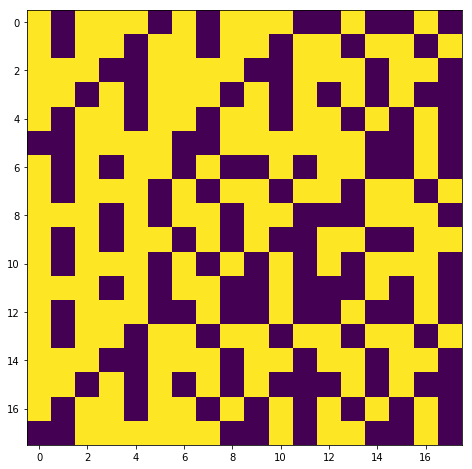

In [212]:
field = unstack('.#./..#/###')
for i in range(5):
    field = enhance(field, mappings)
    plt.imshow(field)

In [204]:
field.sum()

188

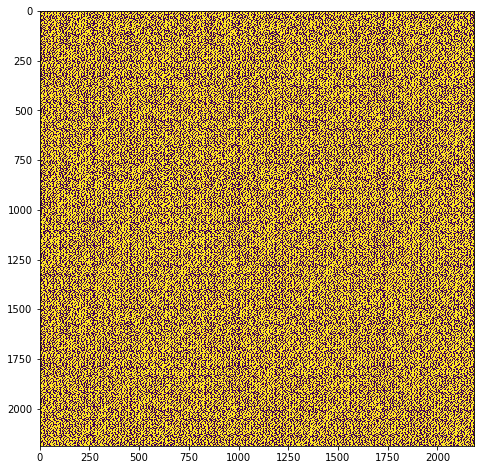

In [247]:
field = unstack('.#./..#/###')
for i in range(18):
    field = enhance(field, mappings)
    plt.imshow(field)

In [207]:
field.sum()

2758764

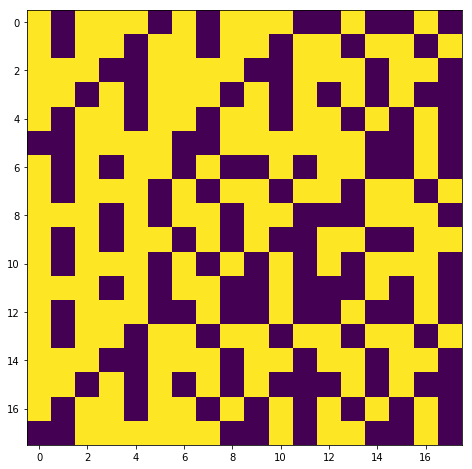

In [214]:
p = plt.imshow(field)